In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./data/credit_card_transactions/fraudTest_mini.csv')

In [24]:
df[['is_fraud']].columns

Index(['is_fraud'], dtype='object')

In [25]:
df.iloc[:, :-1].columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'trans_date_trans_time', 'cc_num',
       'merchant', 'category', 'amt', 'first', 'last', 'gender', 'street',
       'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob',
       'trans_num', 'unix_time', 'merch_lat', 'merch_long'],
      dtype='object')

In [3]:
!pip install --upgrade nbformat

   ---------------------------------------- 0.0/78.5 kB ? eta -:--:--
   ----- ---------------------------------- 10.2/78.5 kB ? eta -:--:--
   ------------------------------- -------- 61.4/78.5 kB 812.7 kB/s eta 0:00:01
   ---------------------------------------- 78.5/78.5 kB 725.7 kB/s eta 0:00:00


In [11]:
import plotly.express as px
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, random_state=0)
X_train, y_train = X[:]
model = LogisticRegression()
model.fit(X, y)
y_score = model.predict_proba(X)[:, 1]
fpr, tpr, thresholds = roc_curve(y, y_score)

# The histogram of scores compared to true labels
fig_hist = px.histogram(
    x=y_score, color=y, nbins=50,
    labels=dict(color='True Labels', x='Score')
)

#fig_hist.show()


'''# Evaluating model performance at various thresholds
df = pd.DataFrame({
    'False Positive Rate': fpr,
    'True Positive Rate': tpr
}, index=thresholds)
df.index.name = "Thresholds"
df.columns.name = "Rate"

fig_thresh = px.line(
    df, title='TPR and FPR at every threshold',
    width=700, height=500
)

fig_thresh.update_yaxes(scaleanchor="x", scaleratio=1)
fig_thresh.update_xaxes(range=[0, 1], constrain='domain')
fig_thresh.show()'''

ValueError: too many values to unpack (expected 2)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [3]:
dataset = pd.read_csv('./data/credit_card_transactions/fraudTest_mini.csv')

In [4]:

# converting to datetime format
dataset["trans_date_trans_time"] = pd.to_datetime(dataset["trans_date_trans_time"])
dataset["dob"] = pd.to_datetime(dataset["dob"])

#Dropping unnecessary columns
dataset.drop(columns=['Unnamed: 0','cc_num','first', 'last', 'street', 'city', 'state', 'zip', 'dob', 'trans_num','trans_date_trans_time'],inplace=True)

#Drop all rows that contain missing values 
dataset = dataset.dropna(ignore_index=True)

In [7]:
#Encoding cateogrical variables
encoder = LabelEncoder()
dataset["merchant"] = encoder.fit_transform(dataset["merchant"])
dataset["category"] = encoder.fit_transform(dataset["category"])
dataset["gender"] = encoder.fit_transform(dataset["gender"])
dataset["job"] = encoder.fit_transform(dataset["job"])

In [20]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [9]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=10, max_depth=15, criterion="gini", min_samples_split=10)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, min_samples_split=10, n_estimators=10)

In [13]:
import shap

# Initialize the SHAP Explainer
explainer = shap.TreeExplainer(model, X_train)

# Compute SHAP values for the test set
shap_values = explainer(X_test)

# Summary Plot
shap.summary_plot(shap_values, X_test)


In [15]:
shap_values.shape

(200, 12, 2)

In [22]:
shap_values.values[:,:,1]

array([[ 0.00686601, -0.00044275,  0.01334307, ...,  0.0341541 ,
         0.00293264,  0.00290269],
       [-0.00610685, -0.00322413, -0.00052996, ..., -0.00402006,
        -0.01078927,  0.02005441],
       [-0.00505987, -0.00227447,  0.00626776, ..., -0.00112252,
        -0.00589052,  0.01001228],
       ...,
       [ 0.03030967, -0.0068236 ,  0.02287481, ..., -0.00418323,
        -0.00772669, -0.00017879],
       [-0.01795707,  0.00027069,  0.01826525, ..., -0.00599117,
        -0.01462614,  0.00536577],
       [ 0.01457569,  0.00104419, -0.01109425, ..., -0.00648734,
         0.00307619,  0.01653958]])

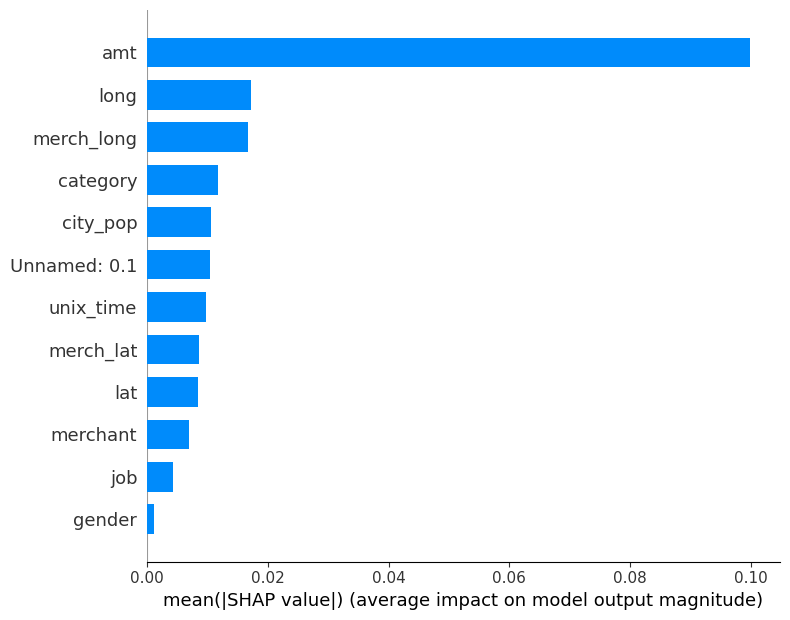

In [23]:
# SHAP values for positive class (class 1)
shap_values_positive = shap_values.values[:,:,1]

# Plot summary plot for positive class
shap.summary_plot(shap_values_positive, X_test, plot_type="bar")

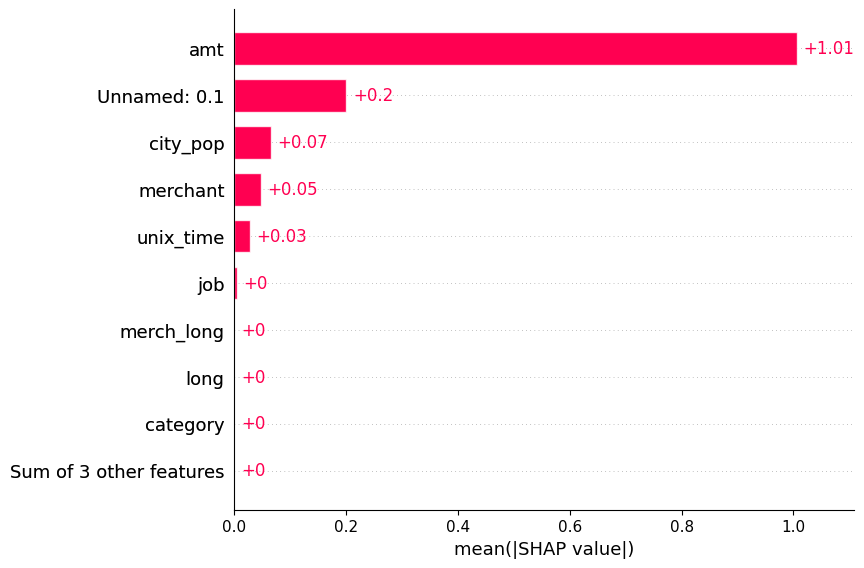

In [22]:
shap.plots.bar(shap_values)

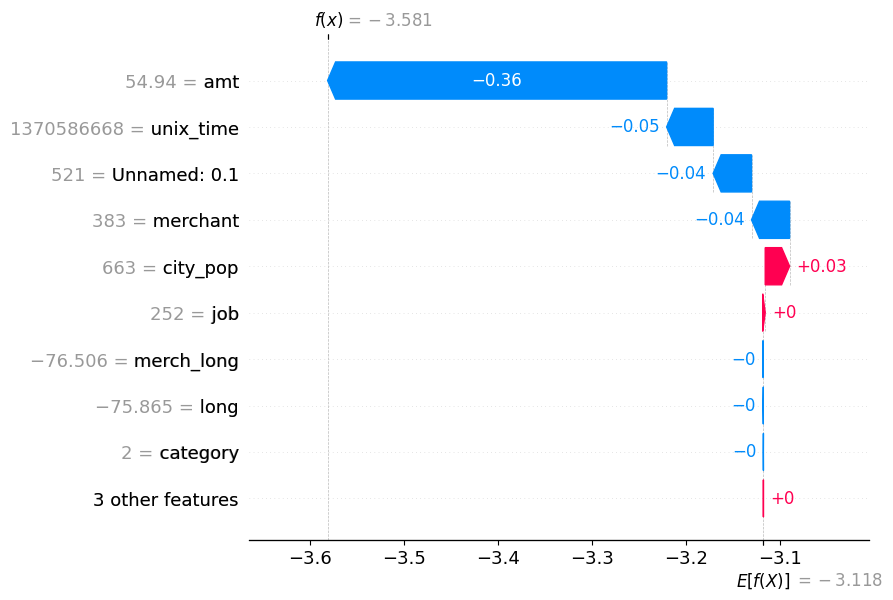

In [24]:
shap.plots.waterfall(shap_values[0])